# Homework 2 Suggested Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

The major difference comes from the vocabulary. See (`vectorizer.get_feature_names_out()`). That is, how to recognize a word is different between the two.

# Question 2

In [2]:
import copy
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict

In [37]:
import math

def cosine_sim(vec1, vec2):
    """
    Since our vectors are dictionaries, lets convert them to lists for easier mathing.
    """
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]
    
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
        
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    
    return dot_prod / (mag_1 * mag_2)

In [4]:
doc_0 = "The faster Harry got to the store, the faster Harry, the faster, would get home."
doc_1 = "Harry is hairy and faster than Jill."
doc_2 = "Jill is not as hairy as Harry."

In [5]:
corpus = [doc_0, doc_1, doc_2]

vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)

print(model.todense())  # The model becomes a sparse numpy matrix, as in a large corpus there would be mostly zeros to deal with.  todense() brings it back to a regular numpy matrix for our viewing pleasure.

[[0.         0.         0.42662402 0.18698644 0.18698644 0.
  0.22087441 0.18698644 0.         0.         0.         0.18698644
  0.         0.74794576 0.18698644 0.18698644]
 [0.46312056 0.         0.35221512 0.         0.         0.35221512
  0.27352646 0.         0.35221512 0.35221512 0.         0.
  0.46312056 0.         0.         0.        ]
 [0.         0.75143242 0.         0.         0.         0.28574186
  0.22190405 0.         0.28574186 0.28574186 0.37571621 0.
  0.         0.         0.         0.        ]]


In [6]:
vector_template = OrderedDict((token, 0) for token in vectorizer.get_feature_names_out())
print(vector_template)

OrderedDict([('and', 0), ('as', 0), ('faster', 0), ('get', 0), ('got', 0), ('hairy', 0), ('harry', 0), ('home', 0), ('is', 0), ('jill', 0), ('not', 0), ('store', 0), ('than', 0), ('the', 0), ('to', 0), ('would', 0)])


In [7]:
document_vectors = []
for doc in model.todense().tolist():

    vec = copy.copy(vector_template)  # So we are dealing with new objects, not multiple references to the same object

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    document_vectors.append(vec)

In [8]:
query = "How long does it take to get to the store?"
test_vec = vectorizer.transform([query]).todense() 
print(test_vec)

[[0.         0.         0.         0.37796447 0.         0.
  0.         0.         0.         0.         0.         0.37796447
  0.         0.37796447 0.75592895 0.        ]]


In [11]:
test = copy.copy(vector_template)
for key, value in zip(vectorizer.get_feature_names_out(), test_vec.tolist()[0]):
    test[key] = value
print(test)

OrderedDict([('and', 0.0), ('as', 0.0), ('faster', 0.0), ('get', 0.37796447300922725), ('got', 0.0), ('hairy', 0.0), ('harry', 0.0), ('home', 0.0), ('is', 0.0), ('jill', 0.0), ('not', 0.0), ('store', 0.37796447300922725), ('than', 0.0), ('the', 0.37796447300922725), ('to', 0.7559289460184545), ('would', 0.0)])


In [12]:
print(cosine_sim(test, document_vectors[0]))
print(cosine_sim(test, document_vectors[1]))
print(cosine_sim(test, document_vectors[2]))

0.5653938522457077
0.0
0.0


# Question 3

In [11]:
path = '/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/HW/data/pg70373.txt'

In [12]:
filename = path
file = open(filename, 'rt')
text = file.read()
file.close()

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Our', 'Arctic', 'province,', 'by', 'Henry', 'Wood', 'Elliott', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States,', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook.', 'Title:', 'Our', 'Arctic', 'province', 'Alaska', 'and']


### 1. use just whitespace

In [67]:
words = text.split()

In [68]:
len(words)

86524

In [69]:
puncs = [',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']']
word_list = [x.lower() for x in words if x not in puncs]

In [75]:
len(word_list)

86519

In [76]:
df1 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])
df1.head(10)

,freq
the,6380
of,3366
to,2690
and,2482
in,1634
was,1565
a,1542
he,1125
that,1075
on,967


In [77]:
# set up the dataframe
df1.reset_index(inplace=True)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,[0,2]]
df1.columns = ['rank','freq']
df1 = df1.set_index('rank')

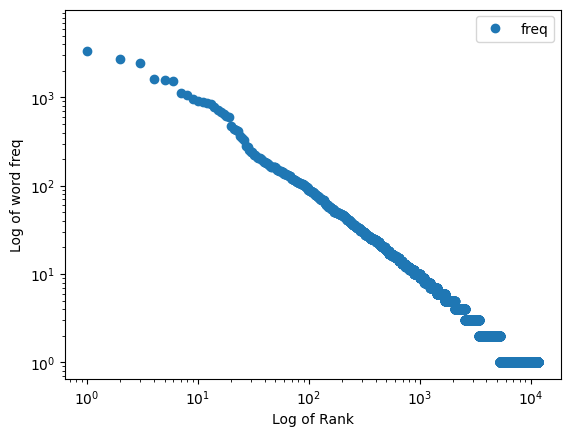

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

### 2. Treebank

In [57]:
from nltk.tokenize import TreebankWordTokenizer

In [80]:
words = TreebankWordTokenizer().tokenize(text)

In [81]:
word_list = [x.lower() for x in words if x not in puncs]

In [82]:
len(word_list)

86656

In [83]:
df2 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])
df2.head(10)

,freq
the,6470
of,3398
to,2701
and,2588
in,1638
was,1614
a,1544
he,1127
that,1125
on,985


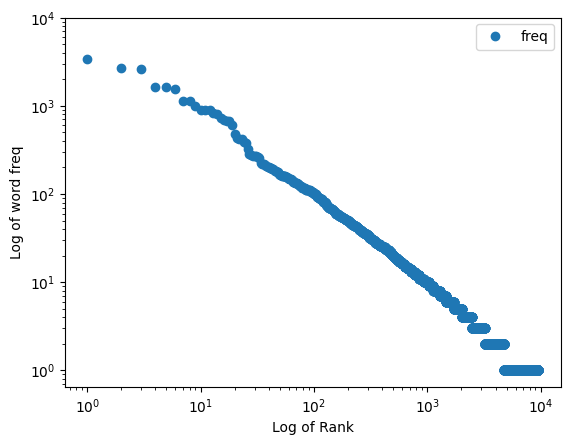

In [84]:
# set up the dataframe
df2.reset_index(inplace=True)
df2.reset_index(inplace=True)
df2 = df2.iloc[:,[0,2]]
df2.columns = ['rank','freq']
df2 = df2.set_index('rank')

fig = plt.figure()
ax = fig.add_subplot(111)
df2.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

### 3. casual_tokenizer

In [85]:
from nltk.tokenize.casual import casual_tokenize

In [87]:
words = casual_tokenize(text, reduce_len=True, strip_handles=True)

In [88]:
word_list = [x.lower() for x in words if x not in puncs]
len(word_list)

88590

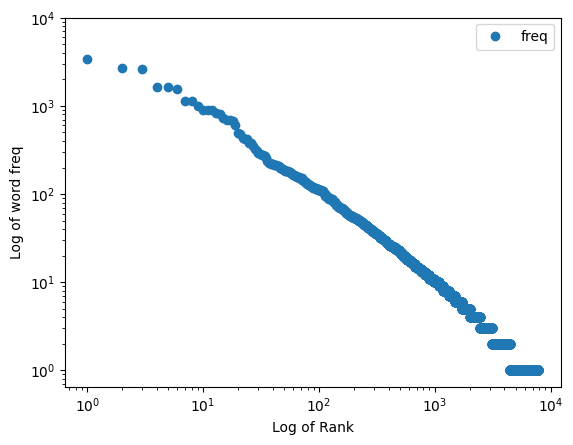

In [89]:
df3 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])

# set up the dataframe
df3.reset_index(inplace=True)
df3.reset_index(inplace=True)
df3 = df3.iloc[:,[0,2]]
df3.columns = ['rank','freq']
df3 = df3.set_index('rank')

fig = plt.figure()
ax = fig.add_subplot(111)
df3.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

# Question 4

In [3]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [4]:
def load_doc(filename):
    # open the file as read only 
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file 
    file.close()
    return text

In [5]:
path = '/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/HW/data/movie_review/'

In [6]:
df_pos = pd.DataFrame()
for filename in listdir(path+'pos'):
    text = load_doc(path+'pos/'+filename)
    temp = pd.DataFrame({'sentiment':[1],'text':[text]})
    df_pos = pd.concat([df_pos,temp],ignore_index= True)
df_neg = pd.DataFrame()
for filename in listdir(path+'neg'):
    text = load_doc(path+'neg/'+filename)
    temp = pd.DataFrame({'sentiment':[0],'text':[text]})
    df_neg = pd.concat([df_neg,temp],ignore_index= True)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_pos, test_pos = train_test_split(df_pos, test_size=0.15, random_state=42)
train_neg, test_neg = train_test_split(df_neg, test_size=0.15, random_state=42)

In [9]:
train = pd.concat([train_pos,train_neg],ignore_index= True)
test = pd.concat([test_pos,test_neg],ignore_index= True)

In [10]:
train

,sentiment,text
0,1,it is easy to label something sentimental or t...
1,1,as a devout atheist and an avowed believer in ...
2,1,losing a job is not an all too uncommon thing ...
3,1,"the central focus of michael winterbottom's "" ..."
4,1,"in one scene from "" the people vs . \nlarry fl..."
...,...,...
1695,0,another formula 'feel good' quirky comedy from...
1696,0,this well-conceived but ultra sugary coming-of...
1697,0,here's a rarity : a children's film that attem...
1698,0,can a horror movie truly be called a horror mo...


In [11]:
test

,sentiment,text
0,1,"eight years after its release , disney has dec..."
1,1,one of the most popular subplots in the entire...
2,1,sometimes i find 19th century british costume ...
3,1,the start of this movie reminded me of parts f...
4,1,it may seem weird to begin a film about glam r...
...,...,...
295,0,i think that saying that the x-files is one of...
296,0,aspiring broadway composer robert ( aaron will...
297,0,lengthy and lousy are two words to describe th...
298,0,"when i ponder childhood memories past , one of..."


## (a)

In [12]:
from nltk.tokenize.casual import casual_tokenize

In [13]:
bags_of_words = []

In [14]:
for text in train.text:
    bags_of_words.append(Counter(casual_tokenize(text)))

In [15]:
df_bows = pd.DataFrame.from_records(bags_of_words)
df_bows = df_bows.fillna(0).astype(int) 
df_bows.shape

(1700, 44893)

In [16]:
df_bows.head()

,it,is,easy,to,label,something,sentimental,or,tear,jerking,...,planting,ballisitic,must-be-improvised,snake-eyes,unrealistic-looking,mispaired,keitel's,woken,sly's,demolition
0,2,5,1,5,1,1,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,6,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10,0,23,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,11,0,9,0,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,9,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.naive_bayes import MultinomialNB 
nb = MultinomialNB()
nb.fit(df_bows, train.sentiment > 0)

MultinomialNB()

In [18]:
train['nb_predict'] = nb.predict(df_bows).astype(int)

In [19]:
train.head()

,sentiment,text,nb_predict
0,1,it is easy to label something sentimental or t...,1
1,1,as a devout atheist and an avowed believer in ...,1
2,1,losing a job is not an all too uncommon thing ...,1
3,1,"the central focus of michael winterbottom's "" ...",1
4,1,"in one scene from "" the people vs . \nlarry fl...",1


In [20]:
train.sentiment.sum()/len(train) * 100

50.0

In [21]:
from sklearn.metrics import confusion_matrix
# training set confusion matrix
confusion_matrix(train.sentiment, train.nb_predict)

array([[838,  12],
       [ 23, 827]])

In [22]:
bags_of_words = []
for text in test.text:
    bags_of_words.append(Counter(casual_tokenize(text)))
df_test_bows = pd.DataFrame.from_records(bags_of_words)
df_test_bows = df_test_bows.fillna(0).astype(int)

In [23]:
df_all_bows = pd.concat([df_bows,df_test_bows], ignore_index=True)
df_all_bows

,it,is,easy,to,label,something,sentimental,or,tear,jerking,...,merteuil,bitch-queen,de-virginize,cecile,caldwell,dork-chick,hargrove,invulnerable,defeating,hand-job
0,2,5,1,5,1,1,1,3,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6,0,6,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10,0,23,0,1,0,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,11,0,9,0,1,1,3,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,9,0,11,0,0,0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,16,49,0,46,0,0,0,4,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0,4,0,7,0,0,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,5,6,0,6,0,0,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,4,12,0,19,0,4,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
test_df_bows = df_all_bows.iloc[len(train):][df_bows.columns]
test_df_bows.shape

(300, 44893)

In [25]:
test_df_bows = test_df_bows.fillna(0).astype(int)

In [26]:
test['nb_predict'] = nb.predict(test_df_bows).astype(int)

In [27]:
test

,sentiment,text,nb_predict
0,1,"eight years after its release , disney has dec...",1
1,1,one of the most popular subplots in the entire...,1
2,1,sometimes i find 19th century british costume ...,1
3,1,the start of this movie reminded me of parts f...,0
4,1,it may seem weird to begin a film about glam r...,1
...,...,...,...
295,0,i think that saying that the x-files is one of...,1
296,0,aspiring broadway composer robert ( aaron will...,1
297,0,lengthy and lousy are two words to describe th...,1
298,0,"when i ponder childhood memories past , one of...",0


In [28]:
confusion_matrix(test.sentiment, test.nb_predict)

array([[131,  19],
       [ 22, 128]])

In [29]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(test.sentiment, test.nb_predict))
print(recall_score(test.sentiment, test.nb_predict))

0.8707482993197279
0.8533333333333334


## (b)

In [38]:
train

,sentiment,text,nb_predict
0,1,it is easy to label something sentimental or t...,1
1,1,as a devout atheist and an avowed believer in ...,1
2,1,losing a job is not an all too uncommon thing ...,1
3,1,"the central focus of michael winterbottom's "" ...",1
4,1,"in one scene from "" the people vs . \nlarry fl...",1
...,...,...,...
1695,0,another formula 'feel good' quirky comedy from...,0
1696,0,this well-conceived but ultra sugary coming-of...,0
1697,0,here's a rarity : a children's film that attem...,0
1698,0,can a horror movie truly be called a horror mo...,0


In [90]:
vectorizer = TfidfVectorizer(tokenizer=lambda text: casual_tokenize(text, reduce_len=True, strip_handles=True))

In [91]:
model = vectorizer.fit_transform(train.text)
vector_template = OrderedDict((token, 0) for token in vectorizer.get_feature_names_out())

In [92]:
document_vectors = []
for doc in model.todense().tolist():

    vec = copy.copy(vector_template)  

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    document_vectors.append(vec)

In [93]:
test_vec = vectorizer.transform(test.text).todense()

In [94]:
test_vectors = []

for doc in test_vec.tolist():
    vec = copy.copy(vector_template)  

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    test_vectors.append(vec)

In [106]:
test['cos_predict'] = None

In [114]:
# `test_vectors` and `document_vectors` are ordered dictionary
for test_itr in test_vectors:
    i = 0
    j = 0
    row = 0
    max_flag = 0
    for itr in document_vectors:
        temp = cosine_sim(test_itr,itr)
        if temp > max_flag:
            j = i
            max_flag = temp
        i += 1
    test.iloc[row,-1] =train.iloc[i,0]
    row += 1

[[0. 0. 0. ... 0. 0. 0.]]
OrderedDict([('\x05', 0.0), ('\x12', 0.0), ('\x13', 0.0), ('\x14', 0.0), ('\x16', 0.0), ('!', 0.0), ('"', 0.0), ('#', 0.0), ('#05425', 0.0), ('#13', 0.0), ('#137', 0.0), ('#15', 0.0), ('#19', 0.0), ('#8216', 0.0), ('$', 0.0), ('%', 0.0), ('&', 0.0), ("'", 0.08007470245154454), ('(', 0.0338231384552764), (')', 0.033803234462882484), ('*', 0.0), ('+', 0.0), (',', 0.16096363991295357), ('-', 0.0), ('.', 0.20900684145676468), ('. \n .', 0.0), ('. \n . \n .', 0.0), ('. \n . \n . \n .', 0.0), ('. \n . . .', 0.0), ('. \n . . . . . . . . . . . . . . . . . . . . . . . . . . .', 0.0), ('. .', 0.0), ('. . .', 0.0), ('. . . \n .', 0.0), ('. . . \n . . .', 0.0), ('. . . .', 0.0), ('. . . . \n .', 0.0), ('. . . . .', 0.0), ('. . . . . .', 0.0), ('. . . . . . .', 0.0), ('. . . . . . . .', 0.0), ('. . . . . . . . . .', 0.0), ('. . . . . . . . . . .', 0.0), ('. . . . . . . . . . . .', 0.0), ('. . . . . . . . . . . . .', 0.0), ('. . . . . . . . . . . . . . .', 0.0), ('. . . . .

AttributeError: 'matrix' object has no attribute 'values'

In [110]:
row

0

In [107]:
test

,sentiment,text,nb_predict,cos_predict
0,1,"eight years after its release , disney has dec...",1,None
1,1,one of the most popular subplots in the entire...,1,None
2,1,sometimes i find 19th century british costume ...,1,None
3,1,the start of this movie reminded me of parts f...,0,None
4,1,it may seem weird to begin a film about glam r...,1,None
...,...,...,...,...
295,0,i think that saying that the x-files is one of...,1,None
296,0,aspiring broadway composer robert ( aaron will...,1,None
297,0,lengthy and lousy are two words to describe th...,1,None
298,0,"when i ponder childhood memories past , one of...",0,None


In [ ]:
import numpy as np
import pandas as pd

def cosine_sim(vec1, vec2):
    """
    Since our vectors are dictionaries, lets convert them to lists for easier mathing.
    """
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]

    dot_prod = np.dot(vec1, vec2)
    mag_1 = np.linalg.norm(vec1)
    mag_2 = np.linalg.norm(vec2)

    return dot_prod / (mag_1 * mag_2)

test_vectors_values = np.array([list(test_vectors.values())])
document_vectors_values = np.array([list(document_vectors.values())]).T
similarities = np.apply_along_axis(lambda x: np.apply_along_axis(cosine_sim, 1, document_vectors_values, x).max(), 1, test_vectors_values)

test.iloc[:, -1] = train.iloc[np.argmax(similarities), 0]


Here, we've used numpy to perform vectorized operations on the vectors represented as dictionaries. We first convert the dictionaries to lists as in the original code. We then use numpy's dot function to calculate the dot product of the vectors, and np.linalg.norm to calculate the magnitude of the vectors. We then calculate the cosine similarity using these values.

Next, we create numpy arrays from the values of the test and document vectors dictionaries. We then transpose the document vectors array to make it easier to calculate the cosine similarities between each test vector and all the document vectors using np.apply_along_axis. Finally, we use np.argmax to find the index of the document vector with the highest cosine similarity for each test vector and update the corresponding row in the test DataFrame.